<a href="https://colab.research.google.com/github/Katinon/Self-Study/blob/main/%ED%98%BC%EC%9E%90-%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%94%A5%EB%9F%AC%EB%8B%9D/02_supervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#도미 35마리, 빙어 14마리를 합친 리스트
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#길이와 무게를 합친 2차원 리스트
fish_data = [[i, j] for i, j in zip(fish_length, fish_weight)]
#도미는 1, 빙어는 0으로 놓은 정답 리스트
fish_target = 35 * [1] + 14 * [0]



In [3]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

#편향된 데이터 (샘플링 편향)
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

kn.fit(train_input, train_target)
kn.score(test_input, test_target)
#훈련 세트에는 빙어가 하나도 들어있지 않아 정확도 0

0.0

In [14]:
import numpy as np

#파이썬 리스트를 넘파이 배열로 바꾸기
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

#배열에서 랜덤하게 샘플을 선택해 훈련세트와 테스트 세트로 만들기
index =np.arange(49) #0~48까지의 배열을 생성하여
np.random.shuffle(index) #무작위로 셔플

#훈련 세트와 테스트 세트를 셔플된 index로 재생성, 배열 인덱싱
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

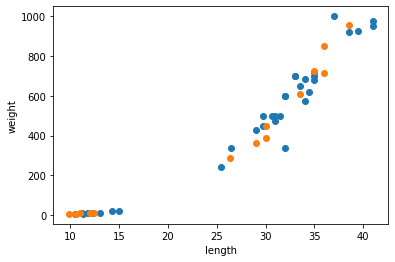

In [15]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#훈련 세트와 테스트 세트가 잘 섞임

In [16]:
#인덱스를 섞어 만든 train_input, train_target으로 모델을 훈련시킨 후
#test_input과 test_target으로 모델을 테스트함
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0